# CNN_BiRNN for Speech Enhancement (Spectrogram)

In [2]:
import sys
## To get helper functions from another folder
# sys.path.insert(0, '../') # if _helper_basics_ is in previous folder
now_i_am_at = 'home' # home dso test
if now_i_am_at=='home': sys.path.insert(0, 'E:/Leonard HDD/Dropbox/DSO/Tasks/')
elif now_i_am_at=='dso': sys.path.insert(0, 'D:/Dropbox/DSO/Tasks')

from _helper_basics_ import *
from _helper_enhancement_ import *

%matplotlib inline
plt.rcParams['savefig.dpi'] = 100

%load_ext autoreload
%autoreload 2

print('keras',      keras.__version__)
print('tensorflow', tf.__version__)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
keras 2.0.8
tensorflow 1.3.0


# Data

In [3]:
sr = 16000

# Setup & Training

## Bidirectional GRU + 1 Single Directional as output.

In [4]:
num_freq,num_time,num_channel    = 129,128,1
filt_incept_list = [[16, 8, 8, 16, 16], 
                    [32, 16, 16, 32, 32],
                    [32, 16, 16, 32, 32], 
                    [16, 8, 8, 16, 16]]
rnn_neu_list = [num_freq,num_freq]
########################### Printing information ###########################
build_model(num_freq,num_time,num_channel, 
                filt_incept_list, rnn_neu_list,
                reg_l2=0.).summary()
# print_model_weights(train_model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input (InputLayer)           (None, 129, 128, 1)       0         
_________________________________________________________________
Conv_SubNet (Model)          (None, 129, 128, 1)       56657     
_________________________________________________________________
reshape_1 (Reshape)          (None, 129, 128)          0         
_________________________________________________________________
permute_1 (Permute)          (None, 128, 129)          0         
_________________________________________________________________
Bi_RNN_SubNet (Model)        (None, 128, 129)          350622    
_________________________________________________________________
permute_2 (Permute)          (None, 129, 128)          0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 129, 128, 1)       0         
Total para

In [5]:
######################## Training Parameters ###############################
decay = 0;          	print('decay',decay)
steps_per_epoch = 500;	print('steps_per_epoch',steps_per_epoch)
epochs = 150;			print('epochs',epochs)
batch_size = 8;   		print('batch_size',batch_size)

decay 0
steps_per_epoch 500
epochs 150
batch_size 8


In [6]:
## Original wavfiles
data_dir  = 'E:/Leonard HDD/Dropbox/Speech Audio Text/3) Dataset/Reverb_2'
noisy_dir = os.path.join(data_dir, 'noisy_trainset_28spk_wav')
clean_dir = os.path.join(data_dir, 'clean_trainset_28spk_wav')
print(noisy_dir)
print(clean_dir)

## Saving
pwd = 'E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation'
save_data_dir = os.path.join(pwd, 'Reverb_Data_28spk_wav')
Noise_Mag_dir = os.path.join(save_data_dir, 'Noise_Mag')
Noise_Pha_dir = os.path.join(save_data_dir, 'Noise_Pha')
Clean_Mag_dir = os.path.join(save_data_dir, 'Clean_Mag')
Clean_Pha_dir = os.path.join(save_data_dir, 'Clean_Pha')
print('save_data_dir',save_data_dir)
print('Noise_Mag_dir',Noise_Mag_dir)
print('Noise_Pha_dir',Noise_Pha_dir)
print('Clean_Mag_dir',Clean_Mag_dir)
print('Clean_Pha_dir',Clean_Pha_dir)

noise_files_list = []
for noise_wav in glob.glob( os.path.join(noisy_dir, '*.wav') ):
    noise_wav_term = noise_wav[len(noisy_dir)+1:len(noise_wav)-4]
    noise_files_list.append(noise_wav_term)
len(noise_files_list)

E:/Leonard HDD/Dropbox/Speech Audio Text/3) Dataset/Reverb_2\noisy_trainset_28spk_wav
E:/Leonard HDD/Dropbox/Speech Audio Text/3) Dataset/Reverb_2\clean_trainset_28spk_wav
save_data_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav
Noise_Mag_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Noise_Mag
Noise_Pha_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Noise_Pha
Clean_Mag_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Clean_Mag
Clean_Pha_dir E:/Leonard HDD/Dropbox/DSO/Tasks/Dereverberation\Reverb_Data_28spk_wav\Clean_Pha


11572

# V1
## 4 Inception + 1 Conv + 1 BiGRU + 1 GRU



In [7]:
Archi_dir = "v1/"
Weights_path = Archi_dir+"Logs/"
Ckpt_Mod_Weights_fold = Archi_dir+"Checkpoint_Model_Weights/"
plot_path_dir = Archi_dir+'Plots/'
if not os.path.exists(Archi_dir): os.mkdir(Archi_dir)
if not os.path.exists(Weights_path): os.mkdir(Weights_path)
if not os.path.exists(Ckpt_Mod_Weights_fold): os.mkdir(Ckpt_Mod_Weights_fold)
if not os.path.exists(plot_path_dir): os.mkdir(plot_path_dir)

#### Initial training : train_model_v1_1

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
Input (InputLayer)               (None, 129, 128, 1)   0                                            
____________________________________________________________________________________________________
0_1b_Conv2D (Conv2D)             (None, 129, 128, 8)   16          Input[0][0]                      
____________________________________________________________________________________________________
0_1c_Conv2D (Conv2D)             (None, 129, 128, 8)   16          Input[0][0]                      
____________________________________________________________________________________________________
0_1a_Conv2D (Conv2D)             (None, 129, 128, 16)  32          Input[0][0]                      
___________________________________________________________________________________________

Epoch 2/150
500/500 [==============================] - 508s - loss: 0.1216   
Epoch 3/150
500/500 [==============================] - 524s - loss: 0.0598   
Epoch 4/150
500/500 [==============================] - 534s - loss: 0.0545   
Epoch 5/150
500/500 [==============================] - 535s - loss: 0.0441   
Epoch 6/150
500/500 [==============================] - 519s - loss: 0.0433   
Epoch 7/150
500/500 [==============================] - 512s - loss: 0.0445   
Epoch 8/150
500/500 [==============================] - 518s - loss: 0.0425   
Epoch 9/150
500/500 [==============================] - 518s - loss: 0.0388   
Epoch 10/150
500/500 [==============================] - 507s - loss: 0.0342   
Epoch 11/150
500/500 [==============================] - 506s - loss: 0.0402   
Epoch 12/150
500/500 [==============================] - 506s - loss: 0.0394   
Epoch 13/150
500/500 [==============================] - 505s - loss: 0.0326   
Epoch 14/150
500/500 [==============================] - 506s

500/500 [==============================] - 492s - loss: 0.0205   
Epoch 68/150
500/500 [==============================] - 492s - loss: 0.0178   
Epoch 69/150
500/500 [==============================] - 492s - loss: 0.0214   
Epoch 70/150
500/500 [==============================] - 492s - loss: 0.0201   
Epoch 71/150
500/500 [==============================] - 492s - loss: 0.0188   
Epoch 72/150
500/500 [==============================] - 492s - loss: 0.0189   
Epoch 73/150
500/500 [==============================] - 492s - loss: 0.0181   
Epoch 74/150
500/500 [==============================] - 492s - loss: 0.0202   
Epoch 75/150
500/500 [==============================] - 492s - loss: 0.0230   
Epoch 76/150
500/500 [==============================] - 493s - loss: 0.0177   
Epoch 77/150
499/500 [============================>.] - ETA: 0s - loss: 0.0181
Epoch 00076: reducing learning rate to 4.0000001899898055e-05.
Epoch 00076: saving model to v1/Checkpoint_Model_Weights/1e-3weights_LR-1.00e-03_

500/500 [==============================] - 491s - loss: 0.0176   
Epoch 133/150
500/500 [==============================] - 494s - loss: 0.0177   
Epoch 134/150
500/500 [==============================] - 493s - loss: 0.0200   
Epoch 135/150
500/500 [==============================] - 492s - loss: 0.0166   
Epoch 136/150
500/500 [==============================] - 495s - loss: 0.0183   
Epoch 137/150
500/500 [==============================] - 496s - loss: 0.0168   
Epoch 138/150
500/500 [==============================] - 496s - loss: 0.0208   
Epoch 139/150
500/500 [==============================] - 496s - loss: 0.0226   
Epoch 140/150
500/500 [==============================] - 496s - loss: 0.0187   
Epoch 141/150
500/500 [==============================] - 496s - loss: 0.0179   
Epoch 142/150
500/500 [==============================] - 496s - loss: 0.0180   
Epoch 143/150
500/500 [==============================] - 497s - loss: 0.0185   
Epoch 144/150
500/500 [==============================]

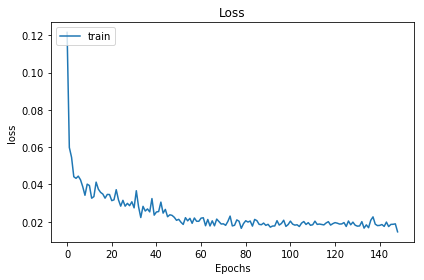

In [20]:
filt_incept_list = [[16, 8, 8, 16, 16], 
                    [32, 16, 16, 32, 32],
                    [32, 16, 16, 32, 32], 
                    [16, 8, 8, 16, 16]]
rnn_neu_list = [num_freq,num_freq]
train_model_v1_1 = build_model(num_freq,num_time,num_channel, filt_incept_list, rnn_neu_list, reg_l2=0.)
train_model_v1_1.summary()
######################## Training Parameters ###############################
learning_rate = 1e-3;   print('learning_rate',learning_rate)
adam_opt = Adam(lr=learning_rate, decay=decay)
train_model_v1_1.compile(loss='mse' ,optimizer=adam_opt)
######################## Checkpoints ###############################
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=10, min_lr=1e-6, cooldown=5, epsilon=1e-05, verbose=1)
CkptFold_det = ['{:.2e}'.format(learning_rate), Ckpt_Mod_Weights_fold, 'v1_1/']
#              [str_int,                       Ckpt_Mod_Weights_Fold, LR_Fold]
ModelCheckpoint_det = ['loss',     1,            False,              True,           1] 
#              [monitor_modes, verbose_ckpt, save_best_only, save_weights_only, period]
ckpt = ckpt_saving(CkptFold_det, ModelCheckpoint_det, save_all=True)
csv_log = CSVLogger(Weights_path+'v1_1_Trg_log_{:.2e}.txt'.format(learning_rate), '\t', append=False)
plot_path = plot_path_dir+'v1_1_{:.2e}.png'.format(learning_rate)
########################### Actual training ##################################
try:
    history_1 = train_model_v1_1.fit_generator( infinite_Gen(batch_size), 
                                               steps_per_epoch=steps_per_epoch, epochs=epochs, verbose=1, 
                                               callbacks=[reduce_lr, csv_log, ckpt], 
                                               validation_data=None, validation_steps=None, 
                                               class_weight=None, max_queue_size=10, workers=1, 
                                               use_multiprocessing=False, shuffle=True, initial_epoch=1)
    plot_loss(history_1, metric_list=['loss'], title='Loss',  plot_path=plot_path)
except KeyboardInterrupt:
    print('\n\nKeyboardInterrupt')

In [172]:
steps_per_epoch

500

In [21]:
save_or_load = 'save'
model_path = Weights_path+Archi_dir[:-1]+"_model_v1_1.json"
weights_path = Weights_path+Archi_dir[:-1]+"_weights_v1_1.h5"
if save_or_load == 'save':
    save_model(train_model_v1_1, model_path, weights_path)
elif save_or_load == 'load':
    train_model_v1_1 = load_model(model_path, 'path', weights_path, 'final')
    train_model_v1_1.summary()

Saved model : v1/Logs/v1_model_v1_1.json
Saved weights : v1/Logs/v1_weights_v1_1.h5


#### Further training : train_model_v1_2

Loaded model from path : v1/Logs/v1_model_v1_1.json
Loaded weights         : v1/Logs/v1_weights_v1_1.h5
learning_rate 0.0001
ckpt_path :  v1/Checkpoint_Model_Weights/v1_2/weights_LR-1.00e-04_Epoch-{epoch:04d}_L-{loss:.2f}.hdf5 

Epoch 2/30
500/500 [==============================] - 512s - loss: 0.0216   
Epoch 3/30
500/500 [==============================] - 506s - loss: 0.0183   
Epoch 4/30
500/500 [==============================] - 511s - loss: 0.0182   
Epoch 5/30
500/500 [==============================] - 510s - loss: 0.0192   
Epoch 6/30
500/500 [==============================] - 509s - loss: 0.0209   
Epoch 7/30
500/500 [==============================] - 509s - loss: 0.0198   
Epoch 8/30
500/500 [==============================] - 510s - loss: 0.0195   
Epoch 9/30
500/500 [==============================] - 510s - loss: 0.0184   
Epoch 10/30
500/500 [==============================] - 507s - loss: 0.0204   
Epoch 11/30
500/500 [==============================] - 500s - loss: 0.0166   

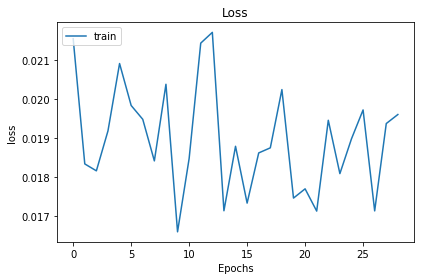

In [131]:
save_or_load = 'load'
model_path = Weights_path+Archi_dir[:-1]+"_model_v1_1.json"
weights_path = Weights_path+Archi_dir[:-1]+"_weights_v1_1.h5"
if save_or_load == 'save':
    save_model(train_model_v1_1, model_path, weights_path)
elif save_or_load == 'load':
    train_model_v1_2 = load_model(model_path, 'path', weights_path, 'final')
######################## Training Parameters ###############################
learning_rate = 1e-4;   print('learning_rate',learning_rate)
adam_opt = Adam(lr=learning_rate, decay=decay)
train_model_v1_2.compile(loss='mse' ,optimizer=adam_opt)
######################## Checkpoints ###############################
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=10, min_lr=1e-6, cooldown=5, epsilon=1e-05, verbose=1)
CkptFold_det = ['{:.2e}'.format(learning_rate), Ckpt_Mod_Weights_fold, 'v1_2/'] 
#              [str_int,                       Ckpt_Mod_Weights_Fold, LR_Fold]
ModelCheckpoint_det = ['loss',     1,            False,              True,           1] 
#              [monitor_modes, verbose_ckpt, save_best_only, save_weights_only, period]
ckpt = ckpt_saving(CkptFold_det, ModelCheckpoint_det, save_all=True)
csv_log = CSVLogger(Weights_path+'v1_2_Trg_log_{:.2e}.txt'.format(learning_rate), '\t', append=False)
plot_path = plot_path_dir+'v1_2_{:.2e}.png'.format(learning_rate)
########################### Further training ##################################
try:
    history_v1_2 = train_model_v1_2.fit_generator( infinite_Gen(batch_size), 
                                               steps_per_epoch=steps_per_epoch, epochs=30, verbose=1, 
                                               callbacks=[reduce_lr, csv_log, ckpt], 
                                               validation_data=None, validation_steps=None, 
                                               class_weight=None, max_queue_size=10, workers=1, 
                                               use_multiprocessing=False, shuffle=True, initial_epoch=1)
    plot_loss(history_v1_2, metric_list=['loss'], title='Loss',  plot_path=plot_path)
except KeyboardInterrupt:
    print('\n\nKeyboardInterrupt')

In [132]:
save_or_load = 'save'
model_path = Weights_path+Archi_dir[:-1]+"_model_v1_2.json"
weights_path = Weights_path+Archi_dir[:-1]+"_weights_v1_2.h5"
if save_or_load == 'save':
    save_model(train_model_v1_2, model_path, weights_path)
elif save_or_load == 'load':
    train_model_v1_2 = load_model(model_path, 'path', weights_path, 'final')
    train_model_v1_2.summary()

Saved model : v1/Logs/v1_model_v1_2.json
Saved weights : v1/Logs/v1_weights_v1_2.h5


## Phase Plots seem rather random, but has several horizontal streaks. 
## Worth investigating learning phase in v2 ?

##### Viewing by librosa

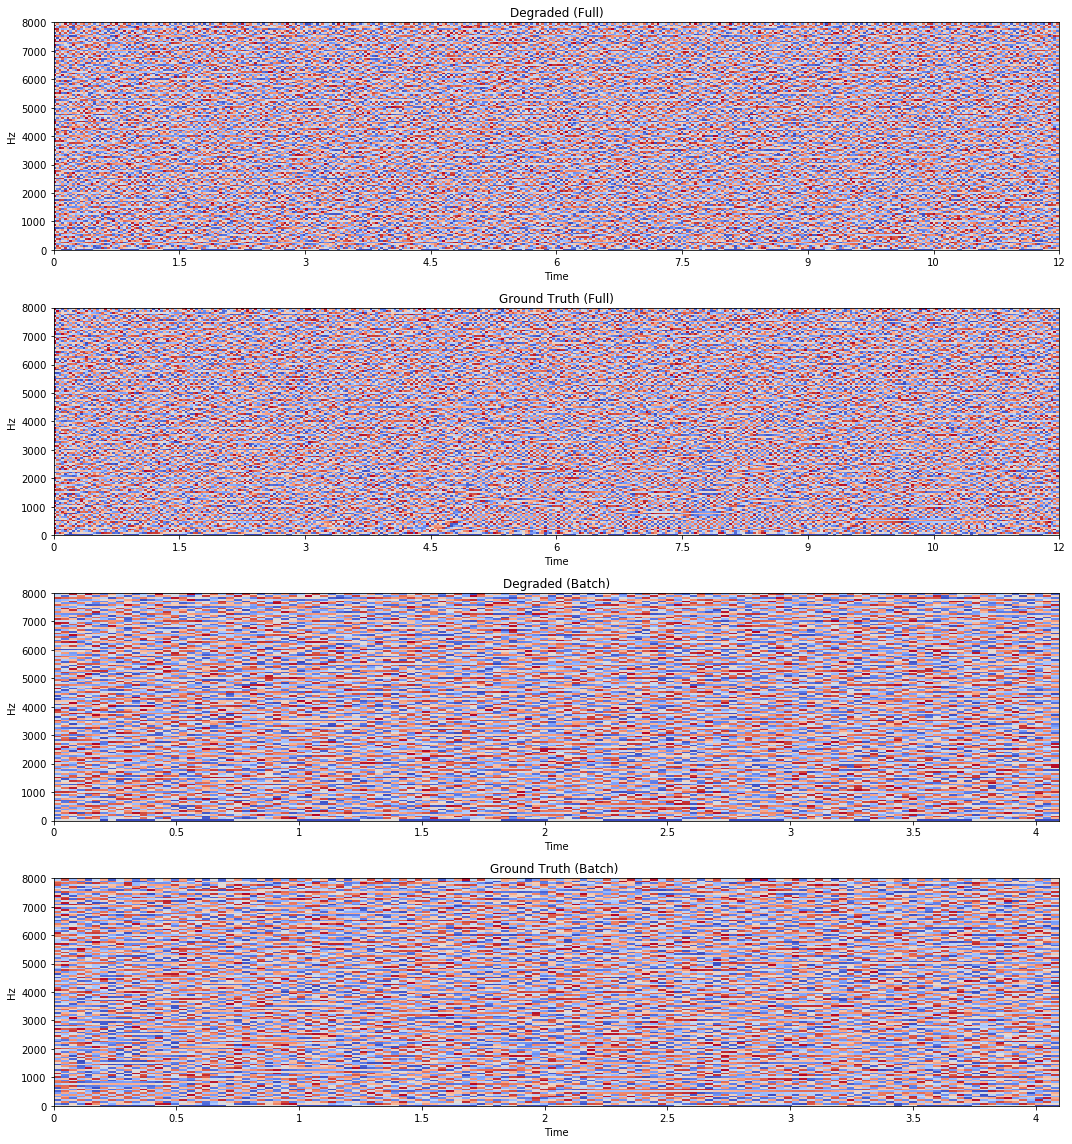

In [119]:
## Phase plots
plt.figure(figsize=(15,16))
k=4;col=1;l=1; colorbar=None
plt.subplot(k,col,l); l+=1; display_audio(x1_pha, 'Degraded (Full)', sr, 'spec', colorbar=colorbar)
plt.subplot(k,col,l); l+=1; display_audio(x2_pha, 'Ground Truth (Full)', sr, 'spec', colorbar=colorbar)

plt.subplot(k,col,l); l+=1; display_audio(x_batch_pha, 'Degraded (Batch)', sr, 'spec', colorbar=colorbar)
plt.subplot(k,col,l); l+=1; display_audio(y_batch_pha, 'Ground Truth (Batch) ', sr, 'spec', colorbar=colorbar)
plt.tight_layout()

##### Viewing by matplotlib

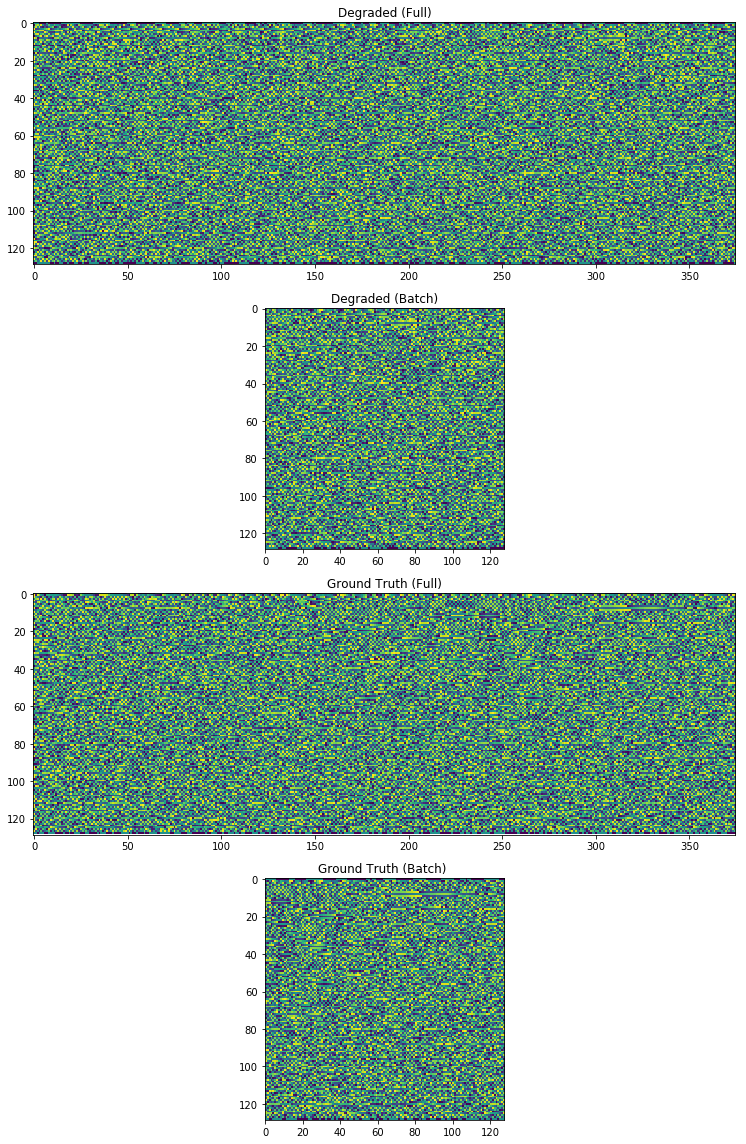

In [122]:
## Phase plots
plt.figure(figsize=(18,16))
k=4;col=1;l=1; colorbar=1 #None
plt.subplot(k,col,l); l+=1; plt.imshow(x1_pha); 
plt.title('Degraded (Full)')
plt.subplot(k,col,l); l+=1; plt.imshow(x_batch_pha); 
plt.title('Degraded (Batch)')
plt.subplot(k,col,l); l+=1; plt.imshow(x2_pha); 
plt.title('Ground Truth (Full)')
plt.subplot(k,col,l); l+=1; plt.imshow(y_batch_pha); 
plt.title('Ground Truth (Batch) ')
plt.tight_layout()